# Exploratory Data Analysis (EDA)
## Credit Card Fraud Detection Dataset

This notebook performs comprehensive exploratory data analysis on the credit card fraud detection dataset.


In [1]:
# Import necessary libraries
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append(str(Path('..')))
from src.data_loader import DataLoader

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


## 1. Load Data


In [2]:
# Initialize data loader
data_loader = DataLoader(data_dir='../data')

# Verify file path
csv_path = Path('../data/creditcard.csv')
print(f"Loading data from: {csv_path.absolute()}")
print(f"File exists: {csv_path.exists()}")

# Load CSV data
df = data_loader.load_csv_data('creditcard.csv')

# Display basic info
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()


Loading data from: d:\h\Financial Fraud Detection-AI\transactions\notebooks\..\data\creditcard.csv
File exists: True
Loading data from ..\data\creditcard.csv...
Loaded 284807 transactions
Fraud cases: 492 (0.17%)

Dataset shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Overview


In [3]:
# Data info
print("Dataset Information:")
print("="*50)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [4]:
# Statistical summary
print("Statistical Summary:")
print("="*50)
df.describe()


Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Target Variable Analysis


In [5]:
# Class distribution
print("Class Distribution:")
print("="*50)
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print(f"Normal (0): {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"Fraud (1):  {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"\nImbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")


Class Distribution:
Normal (0): 284,315 (99.83%)
Fraud (1):  492 (0.17%)

Imbalance Ratio: 577.88:1


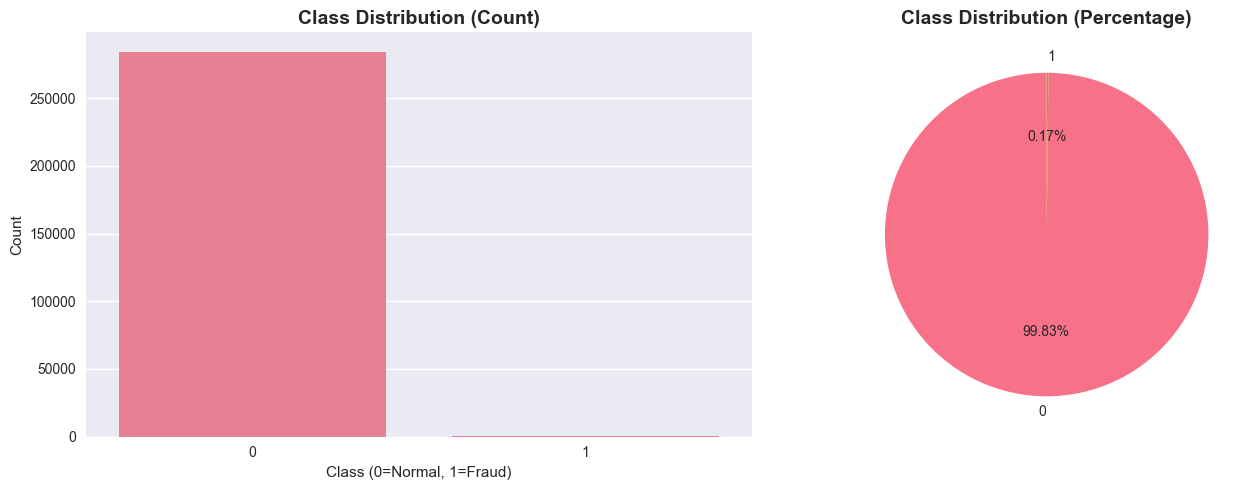

In [6]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Class', ax=axes[0])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Normal, 1=Fraud)')
axes[0].set_ylabel('Count')

# Pie chart
class_counts.plot(kind='pie', ax=axes[1], autopct='%1.2f%%', startangle=90)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


## 4. Transaction Amount Analysis


In [7]:
# Amount statistics by class
print("Transaction Amount Statistics by Class:")
print("="*50)
amount_stats = df.groupby('Class')['Amount'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(amount_stats)


Transaction Amount Statistics by Class:
        count        mean  median         std  min       max
Class                                                       
0      284315   88.291022   22.00  250.105092  0.0  25691.16
1         492  122.211321    9.25  256.683288  0.0   2125.87


## 5. Feature Analysis (V1-V28)


In [ ]:
# Get V features
v_features = [f'V{i}' for i in range(1, 29)]

# Statistical summary of V features
print("V Features Statistics:")
print("="*50)
v_stats = df[v_features].describe()
print(v_stats.T.head(10))


## 6. Summary and Insights


In [8]:
print("="*70)
print("EDA SUMMARY AND KEY INSIGHTS")
print("="*70)
print(f"\n1. Dataset Size: {len(df):,} transactions")
print(f"2. Features: {len(df.columns)-1} features (V1-V28, Time, Amount)")
print(f"3. Class Imbalance: {class_counts[0]/class_counts[1]:.2f}:1 (Normal:Fraud)")
print(f"4. Missing Values: None")
print(f"5. Fraud Rate: {class_percentages[1]:.2f}%")
print(f"\n6. Key Observations:")
print(f"   - Highly imbalanced dataset requires special handling")
print(f"   - V features are PCA transformed (already scaled)")
print(f"   - Amount feature shows different distributions for fraud vs normal")
print(f"   - Time feature may contain temporal patterns")
print(f"\n7. Recommendations:")
print(f"   - Use SMOTE or class weights to handle imbalance")
print(f"   - Scale Amount feature")
print(f"   - Consider time-based features")
print(f"   - Focus on F1-score and PR-AUC for evaluation")
print("="*70)


EDA SUMMARY AND KEY INSIGHTS

1. Dataset Size: 284,807 transactions
2. Features: 30 features (V1-V28, Time, Amount)
3. Class Imbalance: 577.88:1 (Normal:Fraud)
4. Missing Values: None
5. Fraud Rate: 0.17%

6. Key Observations:
   - Highly imbalanced dataset requires special handling
   - V features are PCA transformed (already scaled)
   - Amount feature shows different distributions for fraud vs normal
   - Time feature may contain temporal patterns

7. Recommendations:
   - Use SMOTE or class weights to handle imbalance
   - Scale Amount feature
   - Consider time-based features
   - Focus on F1-score and PR-AUC for evaluation
